# Lab #5
___

**Task:** Implement k-means clustering for given dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from kmeans import KMeans
from sklearn.cluster import KMeans as skl_KM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from misc.estimators import accuracy
from sklearn.cluster import DBSCAN

## Dataset reading
___

_Dataset taken from:_ https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
df = pd.read_csv("../datasets/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data preprocessing
___
Predictor variables standardized, removed outliers using DBSCAN,
samples split on train and test data.

In [3]:
X, Y = df.iloc[:, :-1].to_numpy(), df.iloc[:, -1].to_numpy()

# Standardization
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Drop outliers
dbscan = DBSCAN(eps=3).fit(X, Y)
to_drop = np.squeeze(np.argwhere(dbscan.labels_ == -1))
X = np.delete(X, to_drop, axis=0)
Y = np.delete(Y, to_drop)

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

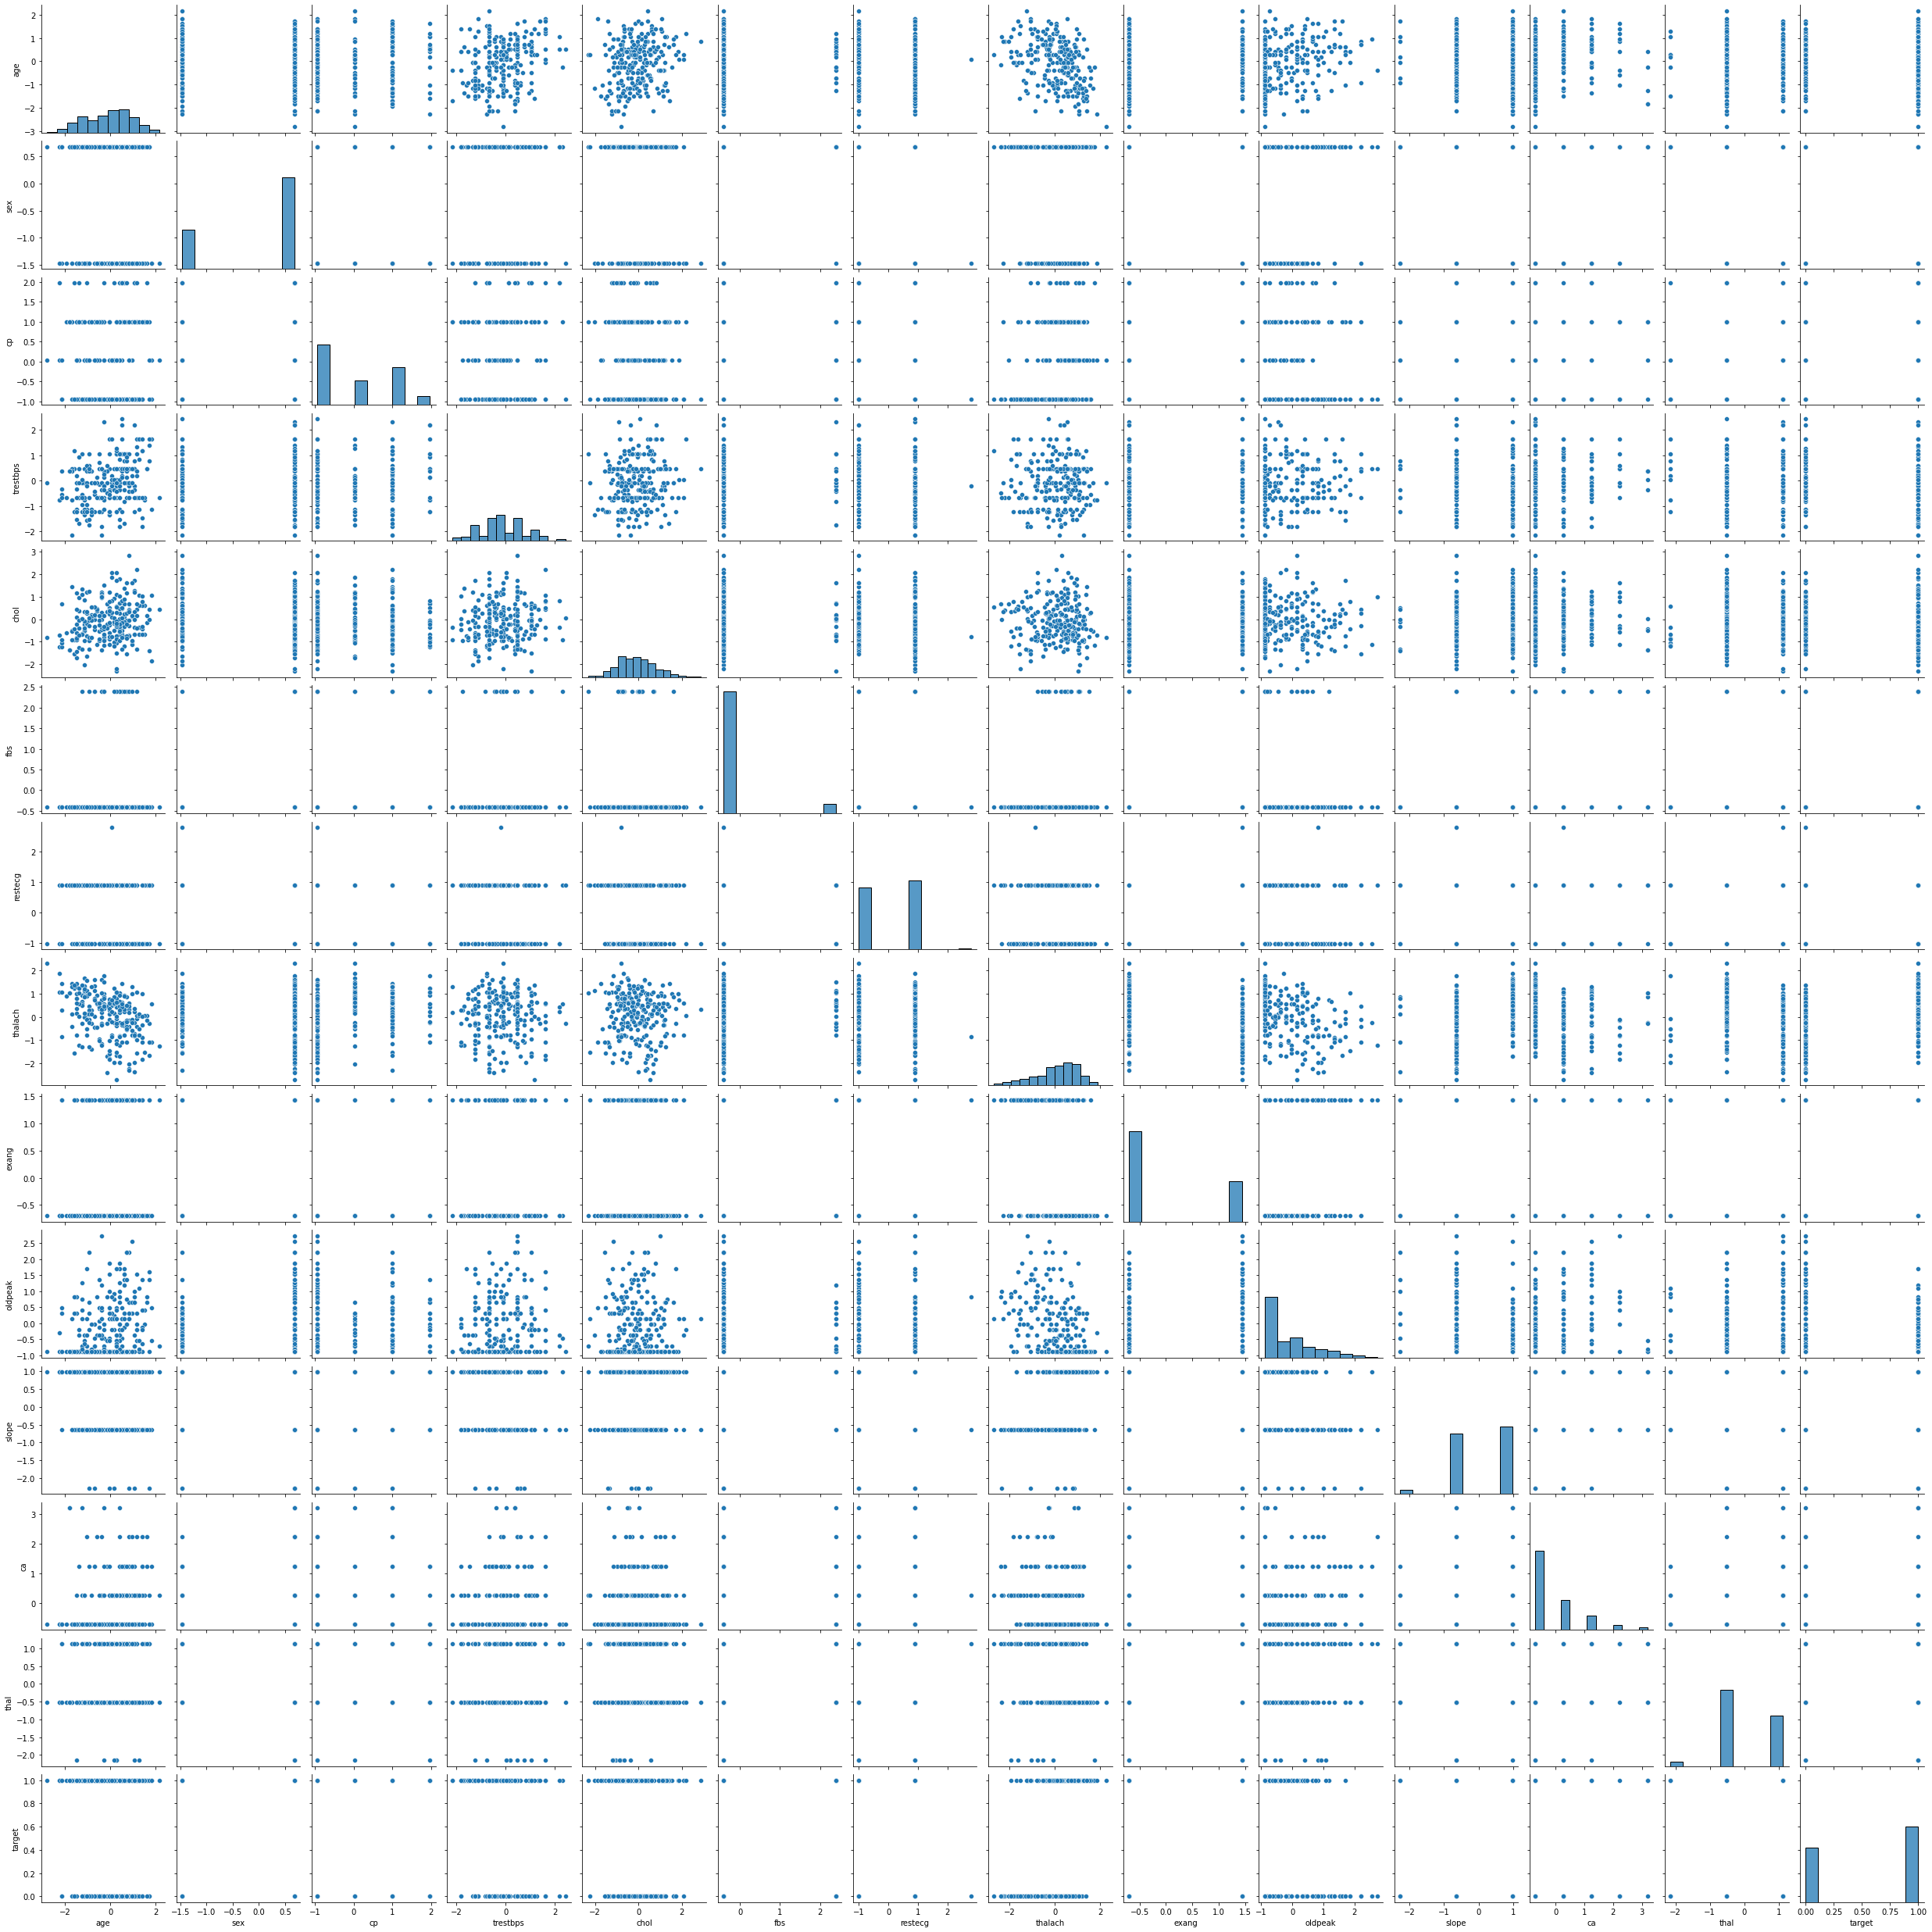

In [4]:
sns.pairplot(pd.DataFrame(np.concatenate([X, Y.reshape((len(Y), 1))], axis=1),
                          columns=df.columns))

## Training k-means model

In [5]:
kms = KMeans(k=2, max_iter=200)
kms.train(X_train)

## Estimations

In [6]:
predictions = kms.predict(X_test)

#### Accuracy:

In [7]:
accuracy(Y_test, predictions), 1 - accuracy(Y_test, predictions)

(0.26, 0.74)

## Using sklearn

In [8]:
skl_kms = skl_KM(n_clusters=2).fit(X_train)
skl_labels = skl_kms.predict(X_test)

In [9]:
accuracy(Y_test, skl_labels), 1 - accuracy(Y_test, skl_labels)

(0.24, 0.76)